In [51]:
%pip install -U scikit-learn
%pip install --user -U nltk
%pip install -U pip setuptools wheel
%pip install -U spacy
!python -m spacy download ru_core_news_lg
%pip install -U joblib
%pip install -U matplotlib



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 2.1/2.1 MB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 15.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python310\\Scripts\\wheel.exe' -> 'c:\\Python310\\Scripts\\wheel.exe.deleteme'


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     --------------------------------------- 11.9/11.9 MB 24.2 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.2
    Uninstalling spacy-3.4.2:
      Successfully uninstalled spacy-3.4.2
  Rolling back uninstall of spacy
  Moving to c:\users\wgmlgz\appdata\roaming\python\python310\scripts\spacy.exe
   from C:\Users\wgmlgz\AppData\Local\Temp\pip-uninstall-5v5jkcx9\spacy.exe
  Moving to c:\users\wgmlgz\appdata\roaming\python\python310\site-packages\spacy-3.4.2.dist-info\
   from C:\Users\wgmlgz\AppData\Roaming\Python\Python310\site-packages\~pacy-3.4.2.dist-info
  Moving to c:\users\wgmlgz\appdata\roaming\python\python310\site-packages\spacy\
   from C:\Users\wgmlgz\AppData\Roaming\Python\Python310\site-packages\~pacy
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python310\\Scripts\\spacy.exe' -> 'c:\\Python310\\Scripts\\spacy.exe.deleteme'


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# import ml packets

In [1]:
import pandas as pd
import numpy as np
import re
import spacy
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
from sklearn import naive_bayes
from sklearn.svm import LinearSVC
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn import ensemble
from sklearn.svm import LinearSVC
import joblib
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wgmlgz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wgmlgz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
class Utils():
    # constructor
    def __init__(self):
        """ Class Constructor """
        self.stop_words = stopwords.words('english')
        unwanted_stopwords = {'no', 'nor', 'not', 'ain', 'aren', "aren't", 'couldn', 'what', 'which', 'who',
                              'whom',
                              'why', 'how', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't",
                              'hasn',
                              "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
                              "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
                              "wasn't",
                              'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'don', "don't"}

        self.excluded_categories = {'Каталог', 'Для маркетплейса'}
        self.stop_words = [
            ele for ele in self.stop_words if ele not in unwanted_stopwords]
        self.wordnet_lemmatizer = WordNetLemmatizer()
        self.nouns = ['NNP', 'NNPS']
        self.nlp = spacy.load('ru_core_news_lg')
        self.label_encoder = LabelEncoder()

    # Function to read data
    def read_data(self, path, sep=",", usecols=[]):
        """ Function to read the data
        @param path (str): path to the dataset
        @param df (pd.DataFrame): pandas DataFrame.
        """
        return pd.read_csv(path,
                           sep=sep,
                           usecols=usecols)

    # Function to decide main categories
    def generate_label(self, df, top=5):
        """ Function to generate labels
        @param df (pd.DataFrame): input data.
        @param top (int): The number of labels to have.
        """
        df['label'] = df.product_category.apply(
            lambda x: x.strip())
        top_categories = list(df[~df['product_category'].isin(self.excluded_categories)].groupby('label').count().sort_values(
            by='product_category', ascending=False).head(top).index)
        df = df[df['label'].isin(top_categories)]
        return df

    # Function to clean text
    def clean_text(self, text, remove_stopwords=True, lemmatize=True):
        """ Function to clean text
        @param text (str): text to be cleaned
        @param remove_stopwords (bool): To remove stopwords or not.
        @param lemmatize (bool): to lemmatize or not.
        """

        # Remove emails
        text = re.sub('\S*@\S*\s?', '', text)

        # Remove new line characters
        text = re.sub('\s+', ' ', text)

        # Remove distracting single quotes
        text = re.sub("\'", '', text)

        # Remove puntuations and numbers
        text = re.sub('\W', ' ', text)

        # Remove single characters
        text = re.sub('\s+\w\s+^I', ' ', text)

        # Remove accented words
        # text = unicodedata.normalize('NFKD', text).encode(
        #     'ascii', 'ignore').decode('utf-8', 'ignore')

        # remove multiple spaces
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'^\s*|\s\s*', ' ', text).strip()
        text = text.lower()

        if not remove_stopwords and not lemmatize:
            return text

        # Remove unncecessay stopwords
        if remove_stopwords:
            text = word_tokenize(text)
            text = " ".join(
                [word for word in text if word not in self.stop_words])

        # Word lemmatization
        if lemmatize:
            text = self.nlp(text)
            lemmatized_text = []
            for word in text:
                if word.lemma_.isalpha():
                    if word.lemma_ != '-PRON-':
                        lemmatized_text.append(word.lemma_.lower())
            text = " ".join([word.lower() for word in lemmatized_text])
        return text

    # Function to prepare data for the model
    def prepare_data(self, df: pd.DataFrame, test_size=0.2, remove_stopwords=True, lemmatize=True):
        """ Function to prepare data for model.
        @param df (pd.DataFrame): input data.
        @param test_size (float): train-test split ratio.
        """
        df = df.sample(frac=1).reset_index(drop=True)
        # df["description"] = df["product_name"] + df["description"]
        description = df['product_name'].apply(lambda x: self.clean_text(
            str(x), remove_stopwords=remove_stopwords, lemmatize=lemmatize))
        
        print('description len:', len(description))
        labels = df['label'].apply(lambda x: self.clean_text(
            str(x), remove_stopwords=remove_stopwords, lemmatize=lemmatize)).values.tolist()
        print('labels len:', len(labels))
        labels = self.label_encoder.fit_transform(labels)
        x_train, x_test, y_train, y_test = train_test_split(description,
                                                            labels,
                                                            test_size=test_size,
                                                            stratify=labels)
        return x_train, x_test, y_train, y_test

    # GENERATE COUNT FEATURES AS VECTORS
    def count_vectorize(self, X_train, X_test, analyzer='word', token_pattern=r'\w{1,}', max_features=10000, ngram_range=(1, 1)):
        """ Function to count vectorize the text data.
        @param X_train (list): list of input train text data.
        @param X_val (list): list of input test text data.
        @param analyzer (string): Whether the feature should be made of word n-gram or character n-grams.(‘word’, ‘char’, ‘char_wb')
        @param token_pattern (string): Regular expression denoting what constitutes a “token”.
        @param max_features (int): Max no. of words to build your vocab.
        @param ngram_range (tuple): The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted.
        @return xtrain_count(list): count vectorized train data.
        @return xvalid_count(list): count vectorized test data.
        """
        if analyzer == 'word':
            count_vect = CountVectorizer(analyzer=analyzer,
                                         token_pattern=token_pattern,
                                         max_features=max_features,
                                         ngram_range=ngram_range)
        else:
            count_vect = CountVectorizer(analyzer=analyzer,
                                         max_features=max_features,
                                         ngram_range=ngram_range)
        count_vect.fit(X_train)

        # transform the training and validation data using count vectorizer object
        xtrain_count = count_vect.transform(X_train)
        xvalid_count = count_vect.transform(X_test)

        return xtrain_count, xvalid_count

    # GENERATE WORD LEVEL TF-IDF FEATURES AS VECTORS
    def tf_idf_vectorize(self, X_train, X_test, analyzer='word', token_pattern=r'\w{1,}', max_features=10000, ngram_range=(1, 1)):
        """ Function to tf-idf vectorize the text data.
        @param X_train (list): list of input train text data.
        @param X_val (list): list of input test text data.
        @param analyzer (string): Whether the feature should be made of word n-gram or character n-grams.(‘word’, ‘char’, ‘char_wb')
        @param token_pattern (string): Regular expression denoting what constitutes a “token”.
        @param max_features (int): Max no. of words to build your vocab.
        @param ngram_range (tuple): The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted.
        @return xtrain_tfidf(list): tf-idf vectorized train data.
        @return xvalid_tfidf(list): tf-idf vectorized test data.
        """
        if analyzer == 'word':
            tfidf_vect = TfidfVectorizer(analyzer=analyzer,
                                         token_pattern=token_pattern,
                                         max_features=max_features,
                                         ngram_range=ngram_range)
        else:
            tfidf_vect = TfidfVectorizer(analyzer=analyzer,
                                         max_features=max_features,
                                         ngram_range=ngram_range)

        tfidf_vect.fit(X_train)

        xtrain_tfidf = tfidf_vect.transform(X_train)
        xvalid_tfidf = tfidf_vect.transform(X_test)

        return xtrain_tfidf, xvalid_tfidf

    # TRAIN ML MODELS
    def train_ml_model(self, classifier, X_train, X_test, y_train, y_test):
        """ Function to train and evaluate the model
        @param classifier (sklearn model): The ML model to be used.
        @param X_train (list): list of input train text data.
        @param X_test (list): list of input test text data.
        @param y_train (list): training data label.
        @param y_test (list): test data label.
        @return accuracy (float): accuracy of the model.
        """
        classifier.fit(X_train, y_train)
        predictions = classifier.predict(X_test)
        accuracy = metrics.accuracy_score(predictions, y_test)
        return classifier, accuracy


In [3]:
utils = Utils()

In [12]:
import json


def prepare_json(path: str, out_path: str):
    obj = json.loads(open(path, 'r', encoding='utf-8').read())
    data = []
    for key in obj:
        row = obj[key]
        if row['title'] is not None and row['description'] is not None and row['category'] is not None and row['hierarchy'] is not None:
            if row['title'].strip() != '' and row['description'].strip() != '' and row['category'].strip() != '' and row['hierarchy'].strip() != '':
                row['category'] = row['hierarchy'].split('/')[0]
                
                data.append(obj[key])
    
    df = pd.json_normalize(data)
    df = df.rename(columns={"title": "product_name", "category": "product_category"})
    df.to_csv(out_path)
    return df

data = prepare_json('./parse/products_data/found.json', './dataset.csv')
data

,product_name,brand,product_category,sku,url,hierarchy,categoryId,description
0,Нож для яблок Яблокорезка Прибор для удаления ...,None,Дом и сад,701414369,https://www.ozon.ru/product/nozh-dlya-yablok-y...,Дом и сад/Посуда/Кухонные принадлежности/Кухон...,14517,Удалитель у яблок предназначен для аккуратного...
1,"Набор доктора игровой 2550 ""Волшебная аптечка""...",Play Smart,Детские товары,178962428,https://www.ozon.ru/product/nabor-doktora-igro...,Детские товары/Игрушки и игры/Сюжетно-ролевые ...,7112,• В наборе медицинские инструменты (25 предмет...
2,Икона Святитель Николай Чудотворец,ЗАВЕТ,Дом и сад,536003504,https://www.ozon.ru/product/ikona-svyatitel-ni...,Дом и сад/Авторские товары ручной работы/Иконы...,35346,"Святитель Николай Мирликийский, или как его ещ..."
3,"Сухое молоко цельное 1000г, 1 кг",NATURALNO,Продукты питания,265143538,https://www.ozon.ru/product/suhoe-moloko-tseln...,"Продукты питания/Масла, соусы, специи/Специи и...",9410,сухое молоко цельное 1 кг
4,"Мука ржаная цельнозерновая из био зерна, рожь,...",Аратай,Продукты питания,257993749,https://www.ozon.ru/product/muka-rzhanaya-tsel...,"Продукты питания/Макароны, крупы, мука/Мука/Рж...",1620,Рожь для этой муки была выращена без использов...
...,...,...,...,...,...,...,...,...
9035,Игрушка антистресс / ЗАЯЦ В МОРКОВКЕ / Фуфлик /,None,Детские товары,717996160,https://www.ozon.ru/product/igrushka-antistres...,Детские товары/Игрушки и игры/Игрушки-антистре...,38098,Веселые фуфлики теперь появились в виде милых ...
9036,Нагрудник CCM TACKS 9040 YTH,CCM,Спорт и отдых,314491183,https://www.ozon.ru/product/nagrudnik-ccm-tack...,Спорт и отдых/Виды спорта/Хоккей/Защита/Нагруд...,38198,Конструкция анатомической формы передней части...
9037,Трусы для бокса Twins Special,Twins Special,Спорт и отдых,494902247,https://www.ozon.ru/product/trusy-dlya-boksa-t...,Спорт и отдых/Бокс и единоборства/Бокс и кикбо...,37414,Боксерские трусы Twins TBS-13 – комфортная мод...
9038,"MUEHLE Бальзам после бритья, Алоэ Вера, 100 мл",MUEHLE,Красота и здоровье,407469555,https://www.ozon.ru/product/muehle-balzam-posl...,Красота и здоровье/Мужская косметика/Бритье и ...,6720,Бальзам после бритья MUEHLE освежает и бодрит ...


In [13]:
data = utils.read_data("./dataset.csv",  
                       usecols=['product_name', 'product_category', 'description'])
data

,product_name,product_category,description
0,Нож для яблок Яблокорезка Прибор для удаления ...,Дом и сад,Удалитель у яблок предназначен для аккуратного...
1,"Набор доктора игровой 2550 ""Волшебная аптечка""...",Детские товары,• В наборе медицинские инструменты (25 предмет...
2,Икона Святитель Николай Чудотворец,Дом и сад,"Святитель Николай Мирликийский, или как его ещ..."
3,"Сухое молоко цельное 1000г, 1 кг",Продукты питания,сухое молоко цельное 1 кг
4,"Мука ржаная цельнозерновая из био зерна, рожь,...",Продукты питания,Рожь для этой муки была выращена без использов...
...,...,...,...
9035,Игрушка антистресс / ЗАЯЦ В МОРКОВКЕ / Фуфлик /,Детские товары,Веселые фуфлики теперь появились в виде милых ...
9036,Нагрудник CCM TACKS 9040 YTH,Спорт и отдых,Конструкция анатомической формы передней части...
9037,Трусы для бокса Twins Special,Спорт и отдых,Боксерские трусы Twins TBS-13 – комфортная мод...
9038,"MUEHLE Бальзам после бритья, Алоэ Вера, 100 мл",Красота и здоровье,Бальзам после бритья MUEHLE освежает и бодрит ...


In [17]:
data = utils.generate_label(data, top=10)
data.label.value_counts()

Дом и сад                 1137
Строительство и ремонт    1011
Автотовары                 635
Книги                      579
Спорт и отдых              578
Одежда                     528
Электроника                518
Красота и здоровье         468
Хобби и творчество         451
Продукты питания           420
Name: label, dtype: int64

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

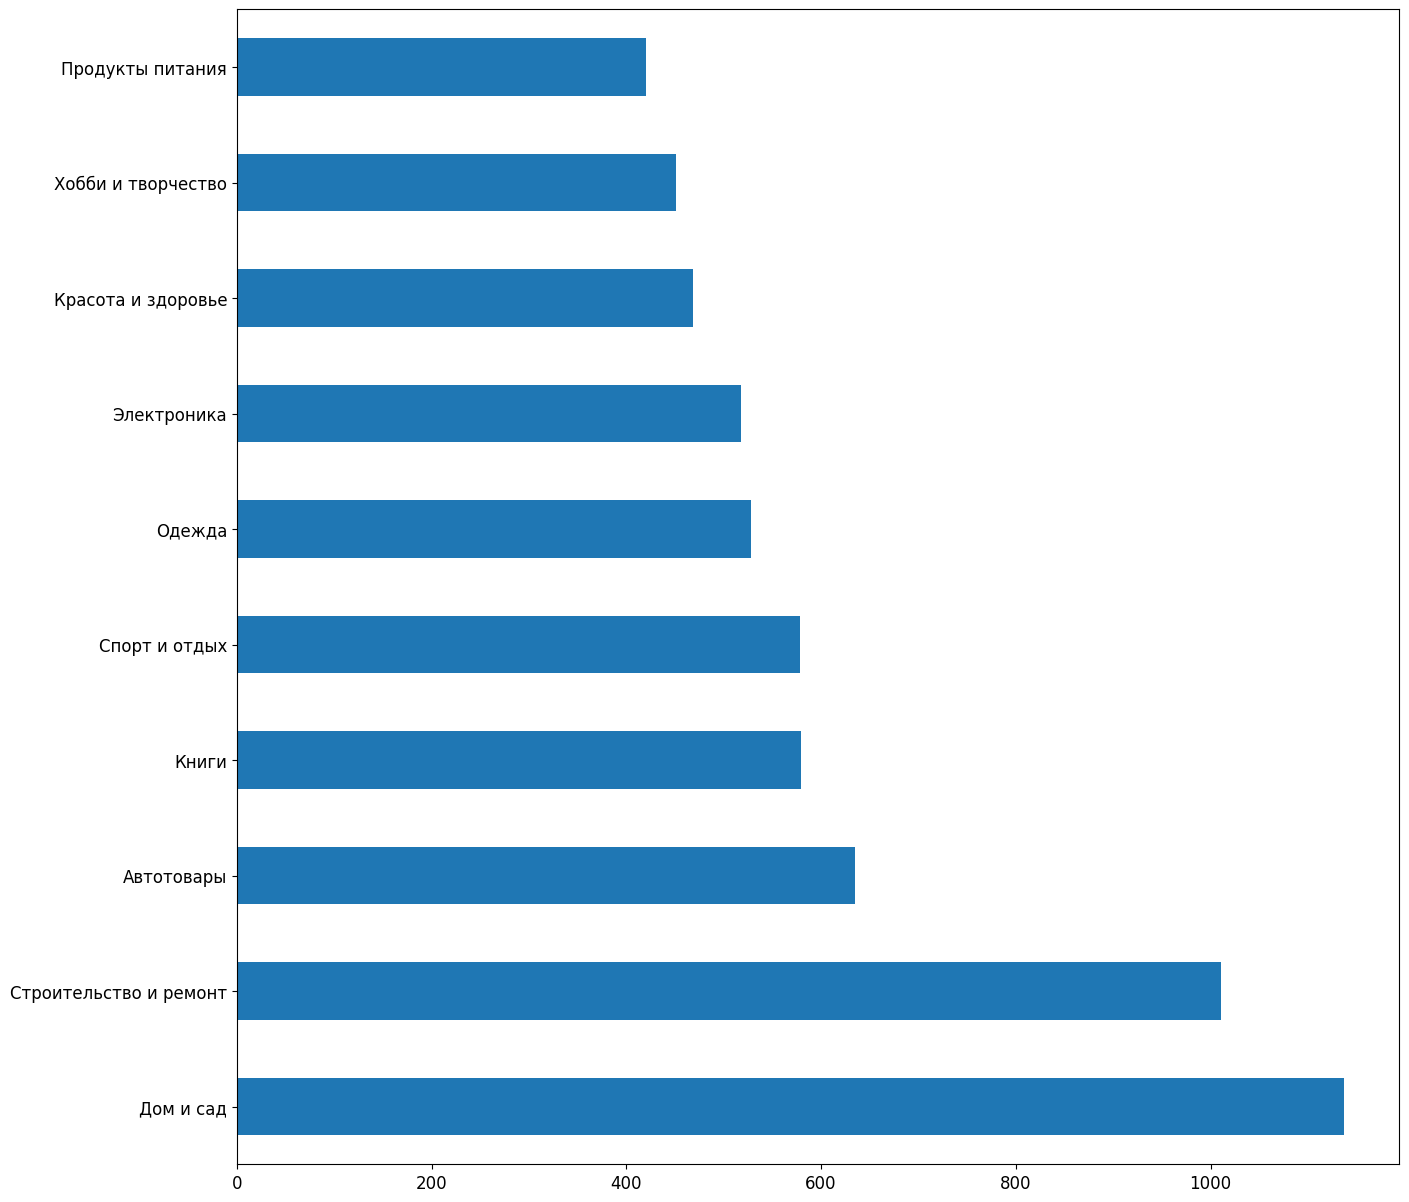

In [18]:
plt.figure(figsize=(15,15))
data['label'].value_counts().sort_values(ascending=False).plot(kind='barh')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

In [19]:
x_train, x_test, y_train, y_test = utils.prepare_data(data, test_size=0.3, remove_stopwords=True, lemmatize=True)

print("Total training examples: ", len(x_train))
print("Total test examples: ", len(x_test))
print(x_train)

description len: 6325
labels len: 6325
Total training examples:  4427
Total test examples:  1898
1899                    бельё для танец и гимнастика solo
4773    чай зелёный моли хуа ча китайский листовой с ж...
2338    мешок для деликатный стирка см мелкий сетка цв...
2083                                      топ бра moonmax
2446        stayer мм лист водостойкий шлифовальный сетка
                              ...                        
2323                                               плавка
3431    гель лак для ногтей фиолетовый с белый хлопьям...
929           помпа клап luzar turbo lwp шт luzar арт lwp
2341    лот шт петля оконная апо для алюминиевый окно ...
3468            подставка для зубочистка qualy см х см шт
Name: product_name, Length: 4427, dtype: object


In [20]:
# Word frequency based representation (only unigrams)
xtrain_count, xvalid_count = utils.count_vectorize(x_train, 
                                                   x_test,
                                                   analyzer='word', 
                                                   token_pattern=r'\w{1,}', 
                                                   max_features=10000, 
                                                   ngram_range=(1,1))

# Word frequency based representation (unigrams and bigrams)
xtrain_count_bi, xvalid_count_bi = utils.count_vectorize(x_train, 
                                                         x_test,
                                                         analyzer='word', 
                                                         token_pattern=r'\w{1,}', 
                                                         max_features=10000, 
                                                         ngram_range=(1,2))

xtrain_count_ngram, xvalid_count_ngram = utils.count_vectorize(x_train, 
                                                               x_test,
                                                               analyzer='word', 
                                                               token_pattern=r'\w{1,}', 
                                                               max_features=10000, 
                                                               ngram_range=(1,3))


xtrain_tfidf, xvalid_tfidf = utils.tf_idf_vectorize(x_train, 
                                                    x_test, 
                                                    analyzer='word', 
                                                    token_pattern=r'\w{1,}', 
                                                    max_features=10000, 
                                                    ngram_range=(1,1))


xtrain_tfidf_bi, xvalid_tfidf_bi = utils.tf_idf_vectorize(x_train, 
                                                          x_test, 
                                                          analyzer='word', 
                                                          token_pattern=r'\w{1,}', 
                                                          max_features=10000, 
                                                          ngram_range=(1,2))


xtrain_tfidf_ngram, xvalid_tfidf_ngram = utils.tf_idf_vectorize(x_train, 
                                                                x_test,
                                                                analyzer='word', 
                                                                token_pattern=r'\w{1,}', 
                                                                max_features=10000, 
                                                                ngram_range=(1,3))

xtrain_tfidf_ngram_chars, xvalid_tfidf_ngram_chars = utils.tf_idf_vectorize(x_train, 
                                                                            x_test,
                                                                            analyzer='char', 
                                                                            token_pattern=r'\w{1,}', 
                                                                            max_features=10000, 
                                                                            ngram_range=(2,3))
print("\nPrepared features for Input data")


Prepared features for Input data


In [97]:
# print()

In [21]:
print("\n ----------------------------------- Evaluation on Multinomial Naive Bayes -----------------------------------n\n")
# Naive Bayes on Count Vectors
model1, accuracy = utils.train_ml_model(naive_bayes.MultinomialNB(), 
                                        xtrain_count, xvalid_count, 
                                        y_train, y_test)
print("Naive Bayes, Count Vectors: ", accuracy)

# Naive Bayes on bigram Count Vectors
model2, accuracy = utils.train_ml_model(naive_bayes.MultinomialNB(),
                                        xtrain_count_bi, xvalid_count_bi,
                                        y_train, y_test)
print("\nNaive Bayes, bigram Count Vectors: ", accuracy)

# Naive Bayes on ngram Count Vectors
model3, accuracy = utils.train_ml_model(naive_bayes.MultinomialNB(),
                                        xtrain_count_ngram, xvalid_count_ngram,
                                        y_train, y_test)
print("\nNaive Bayes, ngram Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
model4, accuracy = utils.train_ml_model(naive_bayes.MultinomialNB(),
                                        xtrain_tfidf, xvalid_tfidf,
                                        y_train, y_test)
print("\nNaive Bayes, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Word Level bigram TF IDF Vectors
model5, accuracy = utils.train_ml_model(naive_bayes.MultinomialNB(),
                                        xtrain_tfidf_bi, xvalid_tfidf_bi,
                                        y_train, y_test)
print("\nNaive Bayes, WordLevel bigram TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
model6, accuracy = utils.train_ml_model(naive_bayes.MultinomialNB(),
                                        xtrain_tfidf_ngram, xvalid_tfidf_ngram,
                                        y_train, y_test)
print("\nNaive Bayes, WordLevel ngram TF-IDF: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
model7, accuracy = utils.train_ml_model(naive_bayes.MultinomialNB(),
                                        xtrain_tfidf_ngram_chars, xvalid_tfidf_ngram_chars,
                                        y_train, y_test)
print("\nNaive Bayes, CharLevel ngram TF-IDF: ", accuracy)



 ----------------------------------- Evaluation on Multinomial Naive Bayes -----------------------------------n

Naive Bayes, Count Vectors:  0.7602739726027398

Naive Bayes, bigram Count Vectors:  0.7702845100105374

Naive Bayes, ngram Count Vectors:  0.7702845100105374

Naive Bayes, WordLevel TF-IDF:  0.6701791359325606

Naive Bayes, WordLevel bigram TF-IDF:  0.6949420442571127

Naive Bayes, WordLevel ngram TF-IDF:  0.6933614330874605

Naive Bayes, CharLevel ngram TF-IDF:  0.47418335089567965


In [22]:
count_vect = CountVectorizer(analyzer='word',
                             token_pattern=r'\w{1,}',
                             max_features=10000,
                             ngram_range=(1, 1))
count_vect.fit(x_train)

CountVectorizer(max_features=10000, token_pattern='\\w{1,}')

In [23]:
def lookup(s):
  sus = x_test.iloc[0:1]
  d = {0: s}
  sus = pd.Series(d)
  trans_sus = count_vect.transform(sus)

  predictions = model1.predict(trans_sus)
  predictions = predictions[0]
  res = (data.label.value_counts().iloc[predictions: predictions + 1].keys()[0])
  return res

In [30]:
print(lookup('Комплект носков UP Fantasy Collection ., 5 пар'))

Одежда
